### Fathia Nuq Qamarina
### 2009106012
### A1 20

### Posttest 5

#### Import dan Read Data

In [229]:
#import package
import pandas as pd
import numpy as np

In [230]:
df = pd.read_csv("Data_Employee_baru.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,EverBenched_No,EverBenched_Yes
0,Bachelors,2017,Bangalore,3.000000,34,Male,No,0,0,1.0,0.0
1,Bachelors,2013,Pune,1.000000,28,Female,No,3,1,1.0,0.0
2,Bachelors,2014,New Delhi,3.000000,29,Female,No,2,0,1.0,0.0
3,Masters,2016,Bangalore,2.698194,27,Male,No,5,1,1.0,0.0
4,Masters,2017,Pune,3.000000,24,Male,Yes,2,1,0.0,1.0


#### Membuat Atribut LeaveOrNot menjadi label

In [231]:
x = df.drop(['EverBenched_No','EverBenched_Yes'], axis=1)
y = df['LeaveOrNot']

#### Membuat encoding data

In [232]:
X = pd.get_dummies(x)
X.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3.000000,34,0,0,1,0,0,1,0,0,0,1,1,0
1,2013,1.000000,28,3,1,1,0,0,0,0,1,1,0,1,0
2,2014,3.000000,29,2,0,1,0,0,0,1,0,1,0,1,0
3,2016,2.698194,27,5,1,0,1,0,1,0,0,0,1,1,0
4,2017,3.000000,24,2,1,0,1,0,0,0,1,0,1,0,1


#### Membagi Data ( Split Data)

In [233]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

#### Normalisasi Data 

In [234]:
from sklearn.preprocessing import StandardScaler

S_scl = StandardScaler()
X_train_std = S_scl.fit_transform(X_train)
X_test_std = S_scl.transform(X_test)

## Algoritma Supervised Learning

### >> K-Nearest Neighbour (KNN)

In [235]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()

model_knn.fit(X_train, y_train)



KNeighborsClassifier()

- Akurasi Data Train dan Test

In [236]:
knn_train = model_knn.score(X_train,y_train)
knn_test = model_knn.score(X_test,y_test)

print('Akurasi test set model KNN : ', round(knn_test,3))
print('Akurasi training set model KNN : ', round(knn_train,3))

Akurasi test set model KNN :  0.899
Akurasi training set model KNN :  0.94


- Akurasi Algoritma

In [237]:
from sklearn.metrics import accuracy_score, confusion_matrix
knn_pred = model_knn.predict(X_test_std)
akurasi_KNN = accuracy_score(y_test, knn_pred)
print("Akurasi algoritma KNN :", round(akurasi_KNN,3))

Akurasi algoritma KNN : 0.618


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### >> Support Vector Machine (SVM)

In [238]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf')

model_svm.fit(X_train,y_train)

SVC()

- Akurasi Data Train dan Test

In [239]:
svm_train = model_svm.score(X_train,y_train)
svm_test = model_svm.score(X_test,y_test)

print("Akurasi Training Set model SVM : ", round(svm_train,3))
print("Akurasi Test Set model SVM     : ", round(svm_test,3))

Akurasi Training Set model SVM :  0.601
Akurasi Test Set model SVM     :  0.618


- Akurasi Algoritma

In [240]:
svm_pred = model_svm.predict(X_test_std)
akurasi_svm = accuracy_score(y_test, svm_pred)
print("Akurasi algoritma SVC :", round(akurasi_svm,3))

Akurasi algoritma SVC : 0.618


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## Membandingkan Algoritma 


In [241]:
# mengimport package
import matplotlib.pyplot as plt
import seaborn as sns

- Akurasi data Test

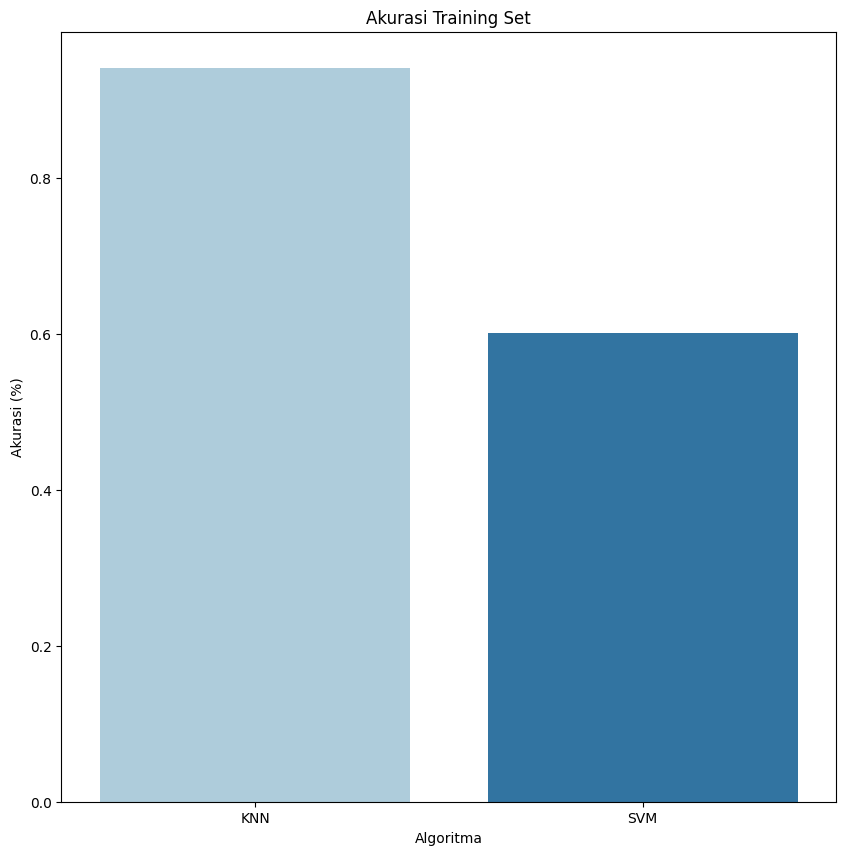

In [242]:
algoritma = ["KNN","SVM"]
pred_train = [knn_train,svm_train]
plt.figure(figsize=(10,10))
sns.barplot(x= algoritma, y= pred_train,palette='Paired')
plt.title("Akurasi Training Set")
plt.xlabel("Algoritma")
plt.ylabel("Akurasi (%)")
plt.show()

- Akurasi data Training

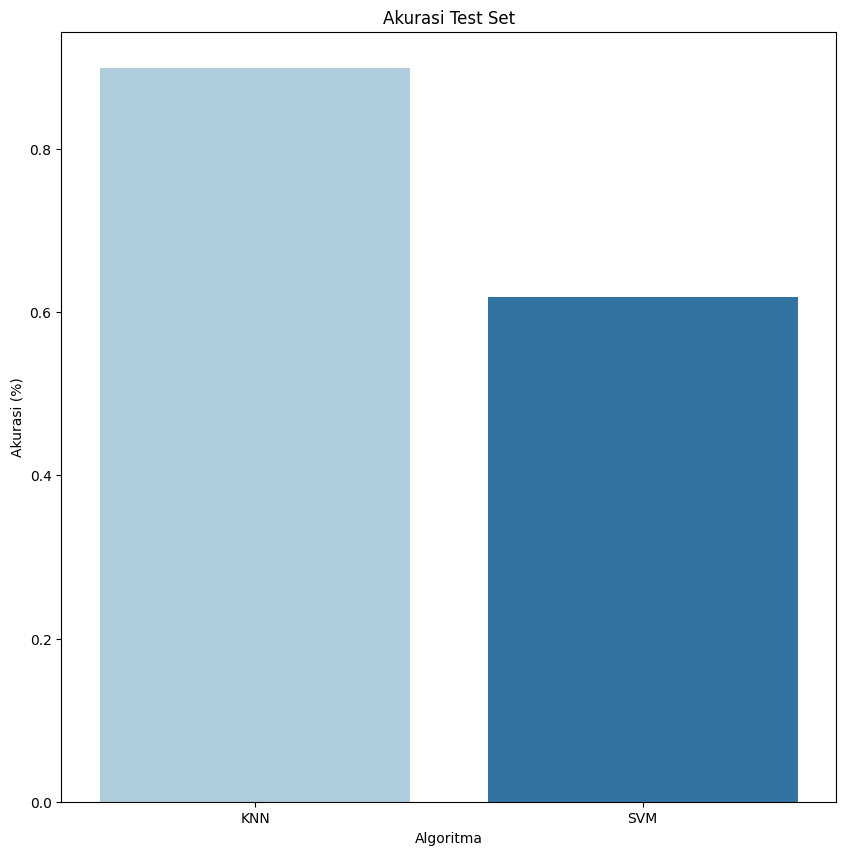

In [243]:
algoritma = ["KNN","SVM"]
pred_test = [knn_test,svm_test]
plt.figure(figsize=(10,10))
sns.barplot(x= algoritma, y= pred_test,palette='Paired')
plt.title("Akurasi Test Set")
plt.xlabel("Algoritma")
plt.ylabel("Akurasi (%)")
plt.show()

- Akurasi Algoritma

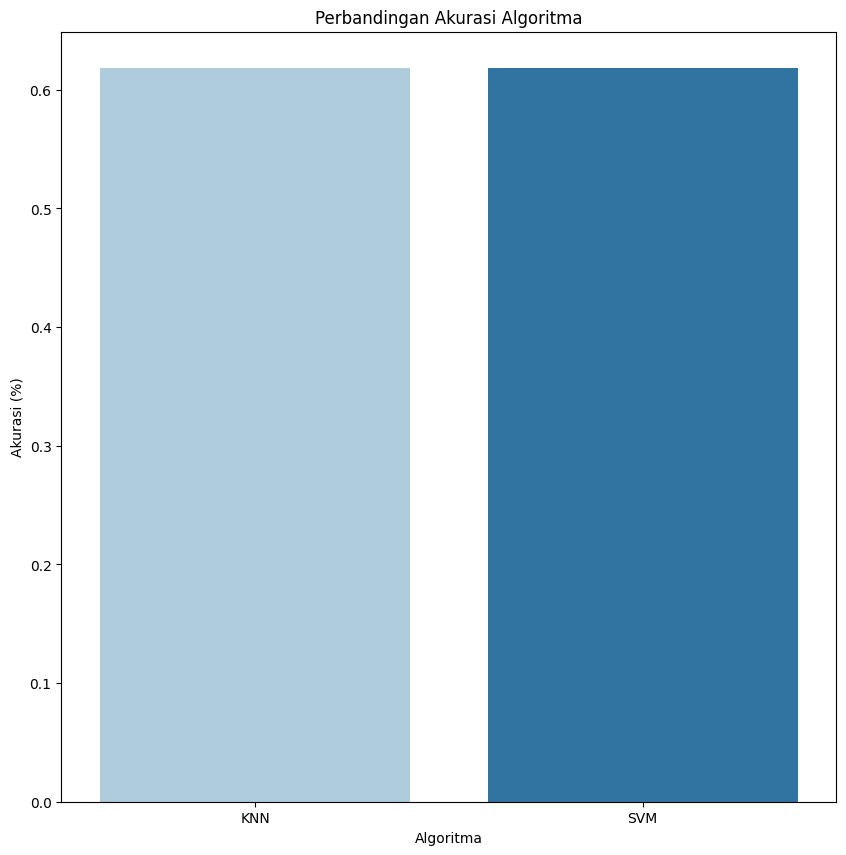

In [244]:
algoritma = ["KNN","SVM"]
akurasi = [akurasi_KNN,akurasi_svm]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = akurasi,palette='Paired')

plt.title("Perbandingan Akurasi Algoritma")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()

## Confusion Matrix

In [245]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Confusion matrix : 

 [[487  26]
 [ 58 259]]


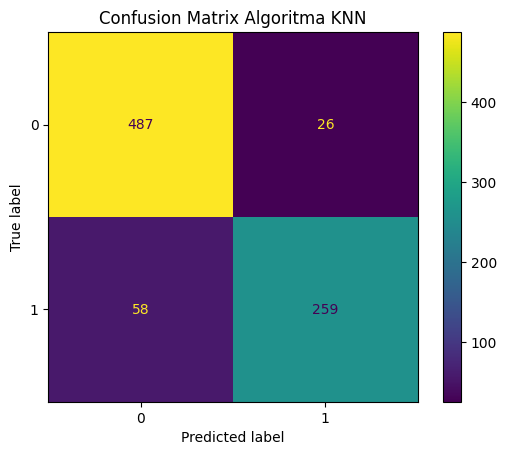

In [246]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, knn_pred)
print('Confusion matrix : \n\n', cm)

displays = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
displays.plot()

plt.title("Confusion Matrix Algoritma KNN")
plt.grid(False)

In [247]:
from sklearn.model_selection import GridSearchCV
modelKNN = KNeighborsClassifier()

param_grid = { "n_neighbors" :[i for i in range(0,5)]}

gsv = GridSearchCV(estimator=modelKNN, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gsv.fit(X_train, y_train)

print("Akurasi Training Set : ",round(gs.score(X_train,y_train)*100,1),"%")

Akurasi Training Set :  96.1 %


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\skl